In [28]:
! python -m pip install segno


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


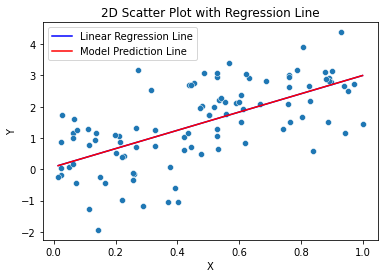

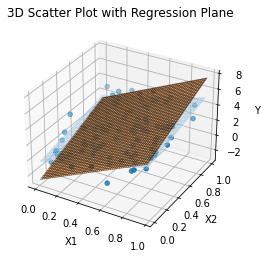

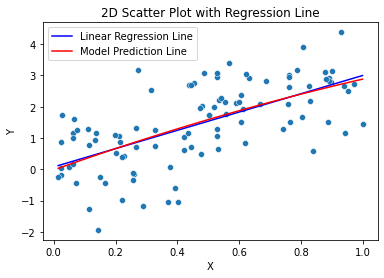

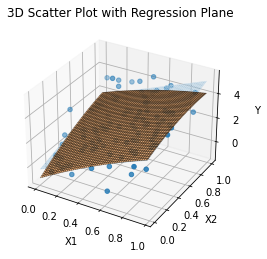

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import odr

class OrthogonalRegression:
    """
    Orthogonal Regression using Ordinary Distance Regression (ODR).

    Attributes
    ----------
    beta : ndarray, shape (3,)
        Coefficients of the fitted linear model.

    Methods
    -------
    fit(X, Y)
        Fit the orthogonal regression model to the data.
    predict(X)
        Predict using the fitted orthogonal regression model.
    _validate_input(X, Y)
        Validate the input data.
    """

    def __init__(self):
        self.beta = None

    def _validate_input(self, X, Y):
        """
        Validate the input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        Y : ndarray, shape (n_samples,)
            Target values.

        Raises
        ------
        ValueError
            If the number of rows in X and Y are different.
        """
        if X.shape[0] != Y.shape[0]:
            raise ValueError("The number of rows in X and Y must be the same.")

    def fit(self, X, Y):
        """
        Fit the orthogonal regression model to the data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        Y : ndarray, shape (n_samples,)
            Target values.
        """
        self._validate_input(X, Y)

        def linear_model(B, x):
            return B[0] * x[0] + B[1] * x[1] + B[2]

        if X.shape[1] == 1:
            X = np.hstack((X, np.zeros_like(X)))

        data = odr.Data(X.T, Y)
        linear = odr.Model(linear_model)
        odr_instance = odr.ODR(data, linear, beta0=[1, 1, 1])
        odr_output = odr_instance.run()

        self.beta = odr_output.beta

    def predict(self, X):
        """
        Predict using the fitted orthogonal regression model.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples.

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted values.
        """
        if X.shape[1] == 1:
            X = np.hstack((X, np.zeros_like(X)))
        return self.beta[0] * X[:, 0] + self.beta[1] * X[:, 1] + self.beta[2]

class PolynomialRegression:
    """
    Polynomial Regression.

    Attributes
    ----------
    degree : int
        Degree of the polynomial.
    poly_features : object
        PolynomialFeatures object to transform data.
    model : object
        Linear regression model to fit and predict data.

    Methods
    -------
    fit(X, Y)
        Fit the polynomial regression model to the data.
    predict(X)
        Predict using the fitted polynomial regression model.
    _validate_input(X, Y)
        Validate the input data.
    """

    def __init__(self, degree=2):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=self.degree)
        self.model = LinearRegression()

    def _validate_input(self, X, Y):
        """
        Validate the input data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        Y : ndarray, shape (n_samples,)
            Target values.

        Raises
        ------
        ValueError
            If the number of rows in X and Y are different.
        """
        if X.shape[0] != Y.shape[0]:
            raise ValueError("The number of rows in X and Y must be the same.")

    def fit(self, X, Y):
        """
        Fit the polynomial regression model to the data.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        Y : ndarray, shape (n_samples,)
            Target values.
        """
        self._validate_input(X, Y)
        X_poly = self.poly_features.fit_transform(X)
        self.model.fit(X_poly, Y)

    def predict(self, X):
        """
        Predict using the fitted polynomial regression model.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples.

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted values.
        """
        X_poly = self.poly_features.transform(X)
        return self.model.predict(X_poly)

class VisualizationModule:
    """
    Visualization module for plotting 2D and 3D scatter plots with regression lines or planes.

    Attributes
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input data.
    Y : ndarray, shape (n_samples,)
        Target values.
    model : object
        A regression model with fit and predict methods.
    lr_model : object
        A linear regression model.
    lr_on : bool
        Flag to control the display of the linear regression line/plane.

    Methods
    -------
    plot()
        Plot the data and regression line/plane.
    """

    def __init__(self, X, Y, model=None):
        self.X = X
        self.Y = Y
        self.model = model if model else LinearRegression()
        self.lr_model = LinearRegression()
        self._validate_input()

    def _validate_input(self):
        if self.X.ndim != 2:
            raise ValueError("Input X must be a 2D array.")
        
        n_features = self.X.shape[1]
        if n_features not in [1, 2]:
            raise ValueError("Input X must have either 1 or 2 columns for this visualization.")

    def _plot_2d(self, lr_on: bool = True):
        """
        Plot 2D scatter plot with regression lines.

        Parameters
        ----------
        lr_on : bool, default=True
            Whether to display the linear regression line.
        """
        sns.scatterplot(x=self.X[:, 0], y=self.Y)
        
        if lr_on:
            self.lr_model.fit(self.X, self.Y)
            line_x = np.linspace(self.X[:, 0].min(), self.X[:, 0].max(), 100).reshape(-1, 1)
            line_y = self.lr_model.predict(line_x)
            plt.plot(line_x, line_y, color='blue', label='Linear Regression Line')

        self.model.fit(self.X, self.Y)
        line_y = self.model.predict(line_x)
        plt.plot(line_x, line_y, color='red', label='Model Prediction Line')
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('2D Scatter Plot with Regression Line')
        plt.legend()
        plt.show()

    def _plot_3d(self, lr_on: bool = True):
        """
        Plot 3D scatter plot with regression planes.

        Parameters
        ----------
        lr_on : bool, default=True
            Whether to display the linear regression plane.
        """
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(self.X[:, 0], self.X[:, 1], self.Y)
        
        if lr_on:
            self.lr_model.fit(self.X, self.Y)
            x = np.linspace(self.X[:, 0].min(), self.X[:, 0].max(), 100)
            y = np.linspace(self.X[:, 1].min(), self.X[:, 1].max(), 100)
            x, y = np.meshgrid(x, y)
            z = self.lr_model.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
            ax.plot_surface(x, y, z, alpha=0.3, edgecolor='w', linewidth=0.5, label='Linear Regression Plane')

        self.model.fit(self.X, self.Y)
        z = self.model.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
        ax.plot_surface(x, y, z, alpha=0.5, edgecolor='k', linewidth=0.5, label='Model Prediction Plane')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        ax.set_title('3D Scatter Plot with Regression Plane')
        plt.show()

    def plot(self):
        """
        Plot the data and regression line/plane.
        """
        n_features = self.X.shape[1]
        
        if n_features == 1:
            self._plot_2d()
        elif n_features == 2:
            self._plot_3d()

# Example usage
data_amount = 100
X_2d = np.random.rand(data_amount, 1)
Y_2d = 3 * X_2d[:, 0] + np.random.randn(data_amount)

X_3d = np.random.rand(data_amount, 2)
Y_3d = 3 * X_3d[:, 0] + 2 * X_3d[:, 1] + np.random.randn(data_amount)

orthogonal_model = OrthogonalRegression()
vis_module_2d_orthogonal = VisualizationModule(X_2d, Y_2d, model=orthogonal_model)
vis_module_2d_orthogonal.plot()
vis_module_3d_orthogonal = VisualizationModule(X_3d, Y_3d, model=orthogonal_model)
vis_module_3d_orthogonal.plot()


poly_model = PolynomialRegression()
vis_module_2d_orthogonal = VisualizationModule(X_2d, Y_2d, model=poly_model)
vis_module_2d_orthogonal.plot()
vis_module_3d_orthogonal = VisualizationModule(X_3d, Y_3d, model=poly_model)
vis_module_3d_orthogonal.plot()

